In [1]:
#import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
#clean data
wine_dataframe=pd.read_csv("Resources/wine_dataset.csv")
wine_dataframe_clean=wine_dataframe.drop(["Unnamed: 0","region_2", "description"], axis=1)
wine_dataframe_clean

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...
150925,Italy,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,Grand Brut RosÃ©,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


In [3]:
clean_wine_data=wine_dataframe_clean.dropna()
clean_wine_data

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...
150923,France,Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


<IPython.core.display.Javascript object>


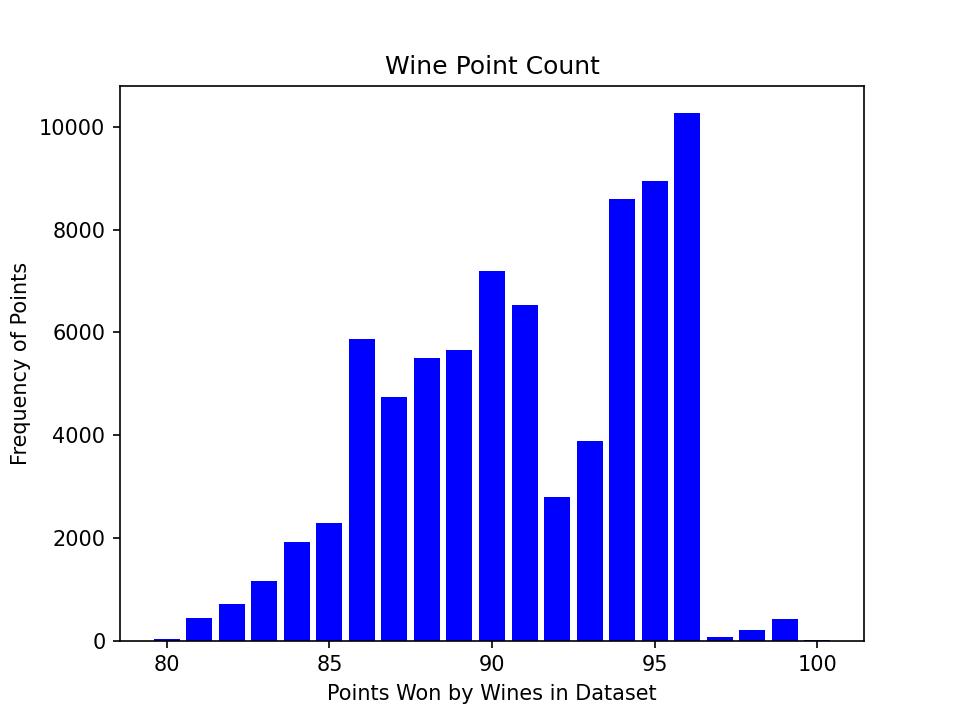

Text(0, 0.5, 'Frequency of Points')

In [5]:
#count breakdown
#make into histogram?
points_count=clean_wine_data["points"].value_counts().tolist()
points_labels=clean_wine_data["points"].unique()
points_labels
points_count

#chart for point breakdown
plt.bar(points_labels,points_count, color='b')

plt.title("Wine Point Count")
plt.xlabel("Points Won by Wines in Dataset")
plt.ylabel("Frequency of Points")

In [6]:
variety_count=clean_wine_data["variety"].value_counts().tolist()
variety_labels=clean_wine_data["variety"].unique()
variety_num=len(variety_labels)
variety_num


427

In [7]:
winery_count=clean_wine_data["winery"].value_counts()
winery_labels=clean_wine_data["winery"].unique()
winery_count


Williams Selyem         302
Testarossa              264
Kendall-Jackson         214
Columbia Crest          212
Trapiche                184
                       ... 
Antichi Vinai 1877        1
Aalto                     1
The Messenger             1
MalvirÃ                   1
Ramiro's Wine Cellar      1
Name: winery, Length: 8652, dtype: int64

In [8]:
#what wineries produce what varieties and the average score and price of the wine variety
winery_variety=clean_wine_data.groupby(["winery","variety"]).mean()
winery_variety

points      price
winery               variety                                     
1+1=3                Cabernet Sauvignon      83.000000  17.333333
                     RosÃ©                   82.000000  18.000000
                     Sparkling Blend         85.750000  13.000000
10 Knots             Grenache                81.000000  35.000000
                     RhÃ´ne-style Red Blend  85.500000  27.000000
...                                                ...        ...
Ã‰cluse              Syrah                   92.000000  38.000000
Ã‰levÃ©e Winegrowers Pinot Noir              92.500000  45.000000
Ã‰ric & JÃ¶el Durand Syrah                   90.000000  39.000000
Ã€nima Negra         Red Blend               89.555556  50.777778
                     White Blend             85.000000  15.285714

[20345 rows x 2 columns]

In [9]:
number_winery=len(winery_labels)
number_winery

8652

In [40]:
country_count=clean_wine_data["country"].value_counts()
country_labels=clean_wine_data["country"].unique()

country_labels
#variety chart
# plt.bar(country_labels,country_count, color='b')
# plt.title("Country Count for Wine in Dataset")
# plt.xlabel("Countries the Wines are from")
# plt.ylabel("Country Frequency")


array(['US', 'Spain', 'France', 'Italy', 'Argentina', 'Canada',
       'Australia'], dtype=object)

In [11]:
#sort by country and then point break down and determine the percentage of wines that score well for each of the countries
usa_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="US")]
point_breakdown_usa=usa_country_count["points"].value_counts().tolist()
point_breakdown_usa_labels=usa_country_count["points"].unique()

# plt.bar(point_breakdown_usa_labels,point_breakdown_usa, color='b')
# plt.title("USA Count for Wine in Dataset")
# plt.xlabel("Countries the Wines are from")
# plt.ylabel("Country Frequency")

array([ 96,  95,  94,  90,  91,  86,  89,  88,  87,  93,  92,  85,  84,
        83,  82,  98,  97,  81,  80, 100,  99], dtype=int64)

In [12]:
spain_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Spain")]
point_breakdown_spain=spain_country_count["points"].value_counts().tolist()
point_breakdown_spain_labels=spain_country_count["points"].unique()


# plt.bar(point_breakdown_spain_labels,point_breakdown_spain, color='r')
# plt.title("Spain Count for Wine in Dataset")
# plt.xlabel("Points from Spain")
# plt.ylabel("Point Frequency Spain")


In [13]:
france_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="France")]
point_breakdown_france=france_country_count["points"].value_counts().tolist()
point_breakdown_france_labels=france_country_count["points"].unique()


# plt.bar(point_breakdown_france_labels,point_breakdown_france, color='y')
# plt.title("France Count for Wine in Dataset")
# plt.xlabel("Points from France")
# plt.ylabel("Point Frequency France")

In [14]:
italy_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Italy")]
point_breakdown_italy=italy_country_count["points"].value_counts().tolist()
point_breakdown_italy_labels=italy_country_count["points"].unique()


# plt.bar(point_breakdown_italy_labels,point_breakdown_italy, color='g')
# plt.title("Italy Count for Wine in Dataset")
# plt.xlabel("Points from Italy")
# plt.ylabel("Point Frequency Italy")

<IPython.core.display.Javascript object>


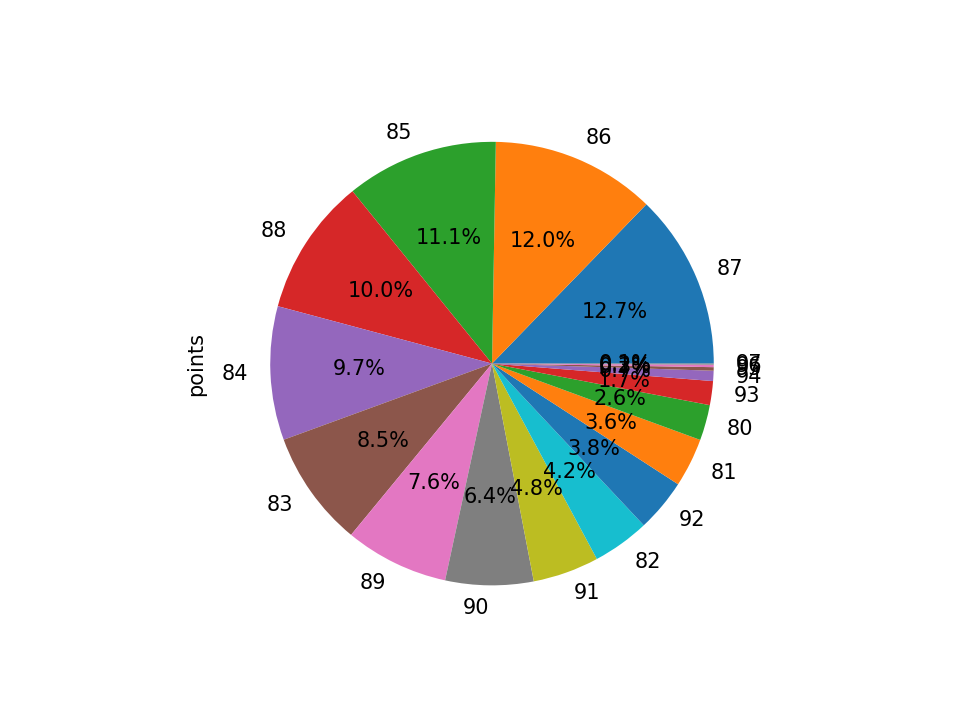

In [4]:
argentina_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")]

argpie=argentina_country_count.points.value_counts()
argpie.plot(kind="pie",autopct='%1.1f%%')
plt.show()

#consider doing plot in pyplot?

# point_breakdown_argentina=argentina_country_count["points"].value_counts()
# point_breakdown_argentina_labels=argentina_country_count["points"].unique()


# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")

In [15]:
#problem with canada doesnt makes sense the point breakdown 
canada_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Canada")]
point_breakdown_canada=canada_country_count["points"].value_counts().tolist()


# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")


In [16]:
australia_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Australia")]
point_breakdown_australia=australia_country_count["points"].value_counts().tolist()


# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")


In [17]:
summary_stat_points=clean_wine_data["points"].describe()
summary_stat_points

count    77284.000000
mean        88.231678
std          3.303169
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [18]:
summary_stat_price=clean_wine_data["price"].describe()
summary_stat_price

count    77284.000000
mean        37.584817
std         36.403885
min          4.000000
25%         18.000000
50%         29.000000
75%         45.000000
max       2013.000000
Name: price, dtype: float64

In [19]:
filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]
country_filter=filter_df["country"].value_counts()
country_filter
# summary=filter_df.groupby(["points"])

US           4736
France       1258
Italy        1156
Spain         269
Australia     227
Argentina     114
Canada          3
Name: country, dtype: int64

In [20]:
#original count
count_us=len(clean_wine_data.loc[(clean_wine_data["country"]=="US")])
count_italy=len(clean_wine_data.loc[(clean_wine_data["country"]=="Italy")])
count_spain=len(clean_wine_data.loc[(clean_wine_data["country"]=="Spain")])
count_france=len(clean_wine_data.loc[(clean_wine_data["country"]=="France")])
count_argentina=len(clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")])
count_canada=len(clean_wine_data.loc[(clean_wine_data["country"]=="Canada")])
count_australia=len(clean_wine_data.loc[(clean_wine_data["country"]=="Australia")])


In [21]:
#count for 93-96
count_us_filter=len(filter_df.loc[(filter_df["country"]=="US")])
count_italy_filter=len(filter_df.loc[(filter_df["country"]=="Italy")])
count_spain_filter=len(filter_df.loc[(filter_df["country"]=="Spain")])
count_france_filter=len(filter_df.loc[(filter_df["country"]=="France")])
count_argentina_filter=len(filter_df.loc[(filter_df["country"]=="Argentina")])
count_canada_filter=len(filter_df.loc[(filter_df["country"]=="Canada")])
count_australia_filter=len(filter_df.loc[(filter_df["country"]=="Australia")])


In [ ]:
#percent of wines from the countries that scored between 93 and 96

In [22]:
usa_percent=(count_us_filter/count_us)*100
usa_percent

11.821971493472455

In [23]:
italy_percent=(count_italy_filter/count_italy)*100
italy_percent

8.612725376247951

In [24]:
spain_percent=(count_spain_filter/count_spain)*100
spain_percent

4.166021372154251

In [25]:
france_percent=(count_france_filter/count_france)*100
france_percent

12.586293146573288

In [26]:
argentina_percent=(count_argentina_filter/count_argentina)*100
argentina_percent

2.9238266222108233

In [27]:
canada_percent=(count_canada_filter/count_canada)*100
canada_percent

2.097902097902098

In [28]:
australia_percent=(count_australia_filter/count_australia)*100
australia_percent

6.8642273964318115

In [29]:
#wines with scores higher than 88 points from each country
greater_than_average=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_than_average

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...
150923,France,Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


In [30]:
#finding percentage which countries that have wineries with above average wine
greater_count_us=len(greater_than_average.loc[(greater_than_average["country"]=="US")])
greater_count_italy=len(greater_than_average.loc[(greater_than_average["country"]=="Italy")])
greater_count_spain=len(greater_than_average.loc[(greater_than_average["country"]=="Spain")])
greater_count_france=len(greater_than_average.loc[(greater_than_average["country"]=="France")])
greater_count_argentina=len(greater_than_average.loc[(greater_than_average["country"]=="Argentina")])
greater_count_canada=len(greater_than_average.loc[(greater_than_average["country"]=="Canada")])
greater_count_australia=len(greater_than_average.loc[(greater_than_average["country"]=="Australia")])


In [32]:
#finding percentage with wineries below average 
#wines with scores lower than 88 points
less_than_average=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
less_than_average

,country,designation,points,price,province,region_1,variety,winery
92,Italy,Nature,86,22.0,Veneto,Prosecco,Glera,De Stefani
93,US,Small Lot Blend,86,13.0,California,Mendocino County,Chardonnay,Parducci
95,France,ChÃ¢teau Beauvillain-Monpezat,86,14.0,Southwest France,Cahors,Malbec-Merlot,Rigal
98,France,Pigmentum,86,15.0,Southwest France,Buzet,Merlot-Malbec,Georges Vigouroux
99,France,Pigmentum,86,10.0,Southwest France,CÃ´tes de Gascogne,Ugni Blanc-Colombard,Georges Vigouroux
...,...,...,...,...,...,...,...,...
150883,US,Reserve White,83,7.0,California,California,Zinfandel,Glen Ellen
150889,US,Lafond Vineyard,82,35.0,California,Santa Ynez Valley,Pinot Noir,Lafond
150892,US,Coastal,82,10.0,California,California,Merlot,Callaway
150911,France,Les Chaliots,87,37.0,Burgundy,Nuits-St.-Georges,Pinot Noir,Michel Gros


In [33]:
#prices of wine with points above average points
price_greater_than=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_price_count=price_greater_than["price"].value_counts()
greater_price_count

#take out prices with one they are outliers

30.0     2065
50.0     2031
40.0     2022
45.0     1887
20.0     1877
         ... 
365.0       1
419.0       1
258.0       1
243.0       1
268.0       1
Name: price, Length: 277, dtype: int64

In [34]:
#finding prices of wines below average 
price_less_than=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
points_prices=price_less_than["price"].value_counts()

#take out prices with one they are outliers
    

<IPython.core.display.Javascript object>


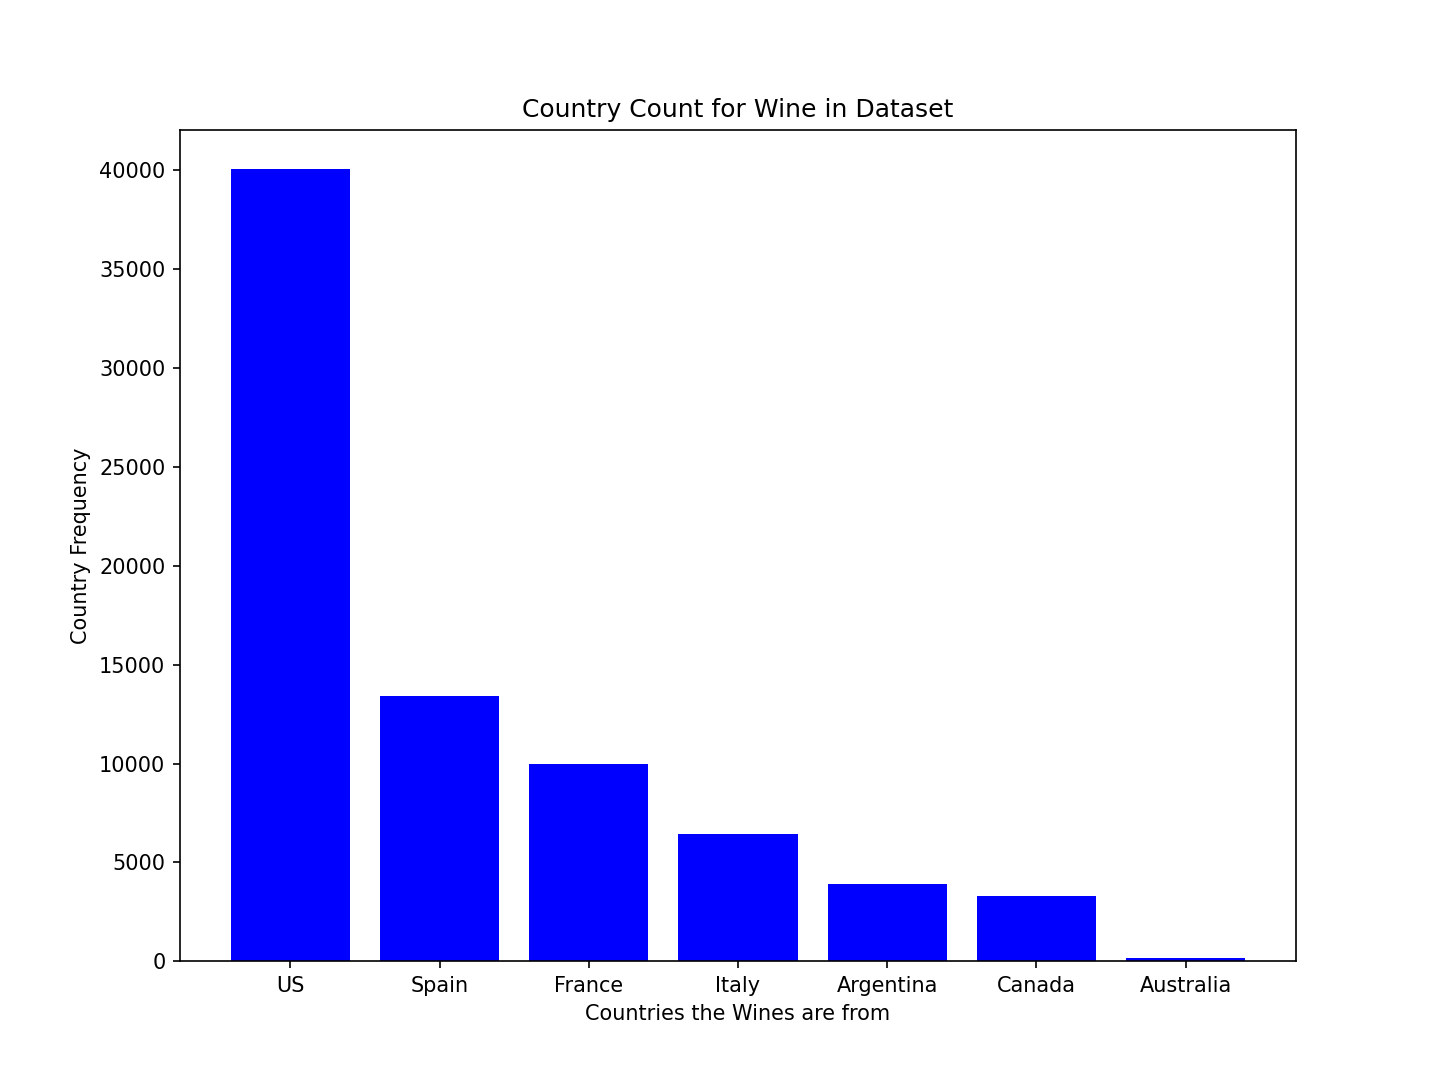

Text(0, 0.5, 'Country Frequency')

In [35]:
#seperate (filterby) the wines that come from the USA and then breakdown by province 
us_wines=clean_wine_data[clean_wine_data.country=="US"]
us_wine_provinces_count=us_wines["province"].value_counts().tolist()
us_wine_provinces_labels=us_wines["province"].unique()

# chart to show most popular province in the US for wine. BAR CHART?
# plt.bar(country_labels,country_count, color='b')
# plt.title("Country Count for Wine in Dataset")
# plt.xlabel("Countries the Wines are from")
# plt.ylabel("Country Frequency")

In [36]:
#breakdown by region of California
california_wine=clean_wine_data[clean_wine_data.province=="California"]
cali_region_wine_count=california_wine["region_1"].value_counts().tolist()
cali_region_wine_labels=california_wine["region_1"].unique()
cali_region_len=len(cali_region_wine_labels)
cali_region_len
#chart or graph

170

<IPython.core.display.Javascript object>


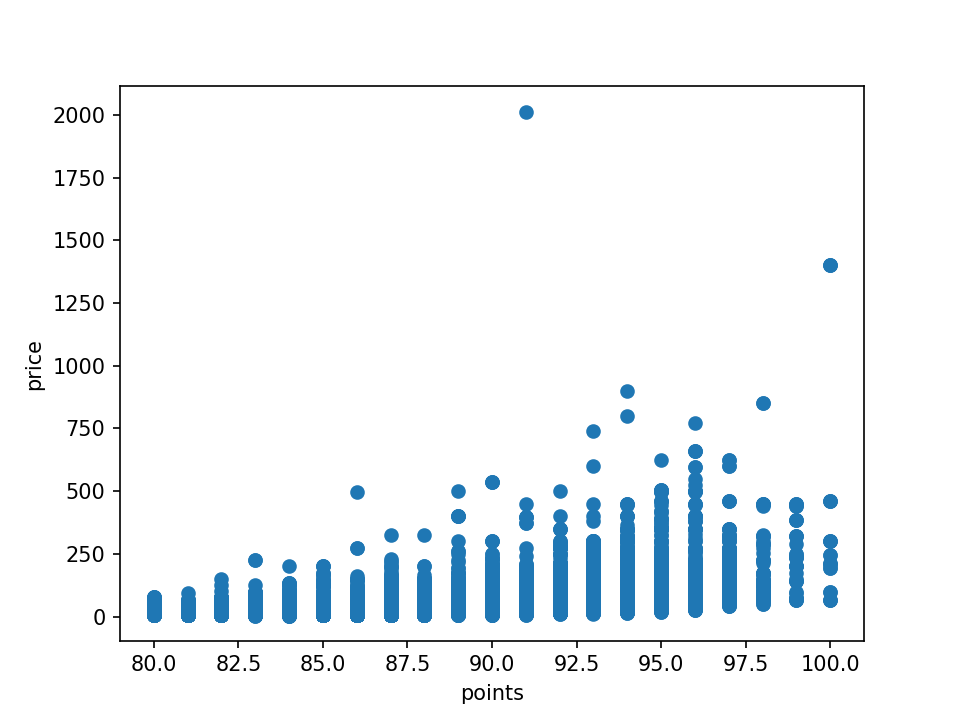

In [37]:
#scatter plot of the price by point value
plt.scatter(clean_wine_data.iloc[:,2],clean_wine_data.iloc[:,3])
plt.xlabel("points")
plt.ylabel("price")
plt.show()

In [38]:
#grouping the wines by variety and determining the average price and points for that variety 
price_filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]
variety_grouped_price_points=price_filter_df.groupby(["variety"]).mean()
variety_grouped_price_points

,points,price
variety,,
Aglianico,93.428571,64.071429
Albana,93.000000,33.000000
AlbariÃ±o,93.000000,26.333333
Alsace white blend,94.444444,49.111111
Barbera,93.000000,47.000000
...,...,...
Viognier-Roussanne,94.000000,30.000000
White Blend,93.661290,49.548387
White Riesling,94.142857,32.142857


In [39]:
#average price and points of wine per country
country_grouped_price_points=clean_wine_data.groupby(["country"]).mean()
country_grouped_price_points

,points,price
country,,
Argentina,86.454219,23.820723
Australia,88.374660,36.857575
Canada,88.335664,39.958042
France,88.861031,45.536068
Italy,88.673968,40.149158
Spain,86.816788,29.281555
US,88.315344,37.471356


In [31]:
#Average points and price per variety in each country
grouped_country_variety_price_point=clean_wine_data.groupby(["country","variety"]).mean()
grouped_country_variety_price_point

points      price
country   variety                                         
Argentina Barbera                     85.000000  18.000000
          Bonarda                     86.543478  16.847826
          Bordeaux-style Red Blend    89.290323  42.623656
          Bordeaux-style White Blend  83.000000  14.000000
          Cabernet Blend              89.750000  29.375000
...                                         ...        ...
US        Viognier-Roussanne          90.071429  28.000000
          White Blend                 87.168896  20.744147
          White Riesling              90.210526  27.263158
          Zinfandel                   86.955627  28.647497
          Zweigelt                    88.000000  24.000000

[727 rows x 2 columns]

In [46]:
country_list=country_labels.tolist()
country_list

point_list=[]

for country in country_list:
    
    points_final= clean_wine_data.loc[clean_wine_data["country"]==country,"points"]
    point_list.append(points_final)
    
    quartiles = points_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = points_final.loc[( points_final < lower_bound) | (points_final > upper_bound)]
    print(f"{country}'s potential outliers: {outliers}")

US's potential outliers: 19354     100
19356      99
19357      99
34649      99
42798      99
42799      99
81688      99
84034     100
84036      99
84037      99
90438      99
90439      99
92916     100
98647     100
114272    100
119194    100
119196     99
119197     99
122767    100
127492     99
143522    100
Name: points, dtype: int64
Spain's potential outliers: 6005      97
10538     98
10595     97
23766     97
68239     97
70169     97
90441     97
94649     97
113029    97
130889    97
135709    97
140176    98
Name: points, dtype: int64
France's potential outliers: 26296     100
26297      99
26298      98
51886     100
51887      99
51888      98
60906      98
68237      99
68238      98
83536     100
83537      99
83538      98
84757      80
92436      98
109155     80
113027     99
113028     98
125256     98
135707     99
135708     98
141923     80
144646     80
144650     80
Name: points, dtype: int64
Italy's potential outliers: 10        95
2146      99
2150      9

<IPython.core.display.Javascript object>


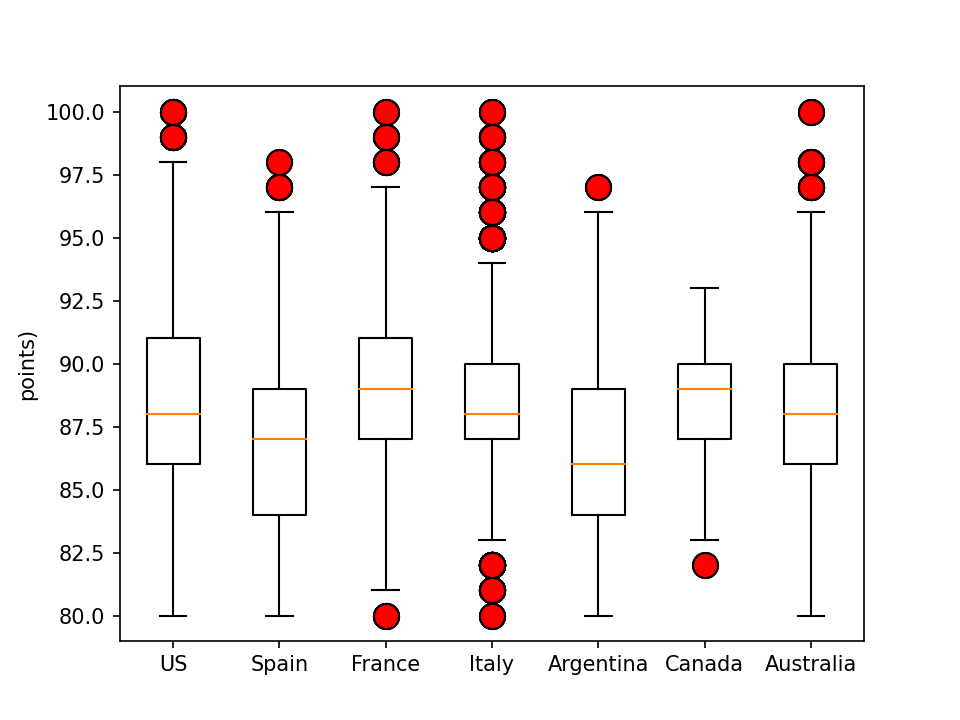

In [47]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(point_list, labels = country_list,flierprops=orange_out)
plt.ylabel('points)')
plt.show()

In [48]:
country_list=country_labels.tolist()
country_list

price_list=[]

for country in country_list:
    
    price_final= clean_wine_data.loc[clean_wine_data["country"]==country,"price"]
    price_list.append(price_final)
    
    quartiles = price_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = price_final.loc[( price_final < lower_bound) | (price_final > upper_bound)]
    print(f"{country}'s potential outliers: {outliers}")

US's potential outliers: 0         235.0
2          90.0
14        185.0
15         90.0
16        325.0
          ...  
149117    100.0
149257     94.0
149272    100.0
149571     95.0
150762    100.0
Name: price, Length: 2067, dtype: float64
Spain's potential outliers: 1         110.0
5          73.0
6          65.0
7         110.0
17         80.0
          ...  
146835     70.0
149240    185.0
149242     75.0
149247    125.0
149510     72.0
Name: price, Length: 626, dtype: float64
France's potential outliers: 18        290.0
1211      141.0
1728      117.0
2444      120.0
3355      130.0
          ...  
144225    235.0
144518    120.0
144823    158.0
145147    122.0
146180    167.0
Name: price, Length: 618, dtype: float64
Italy's potential outliers: 35        135.0
50        100.0
342       115.0
769       110.0
874       113.0
          ...  
145422    217.0
145881    116.0
145888    104.0
146162    100.0
148578     99.0
Name: price, Length: 706, dtype: float64
Argentina's potential

<IPython.core.display.Javascript object>


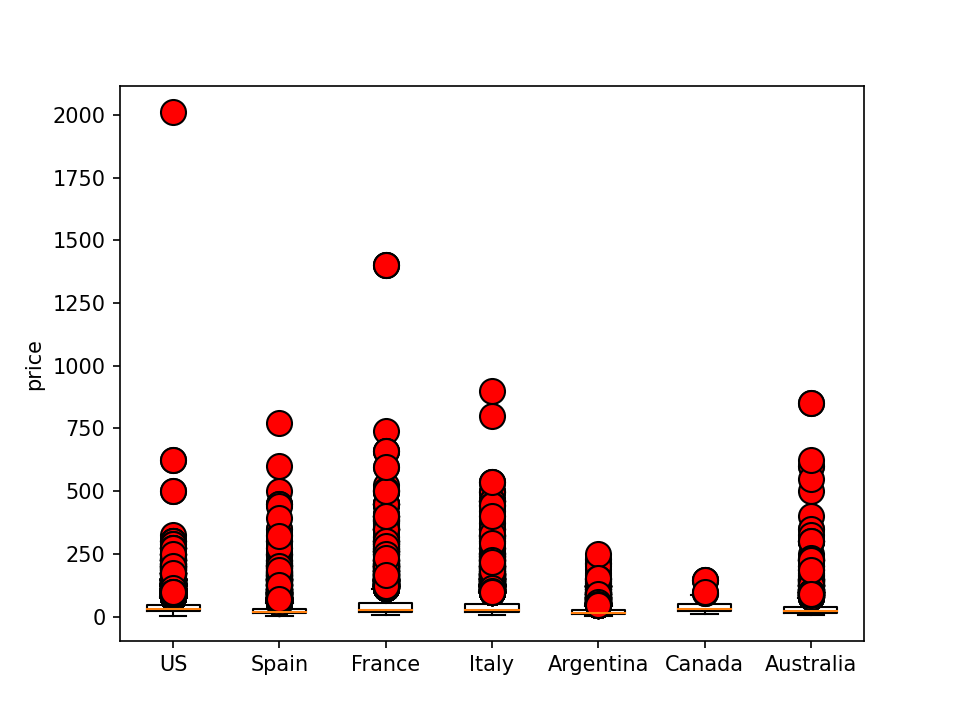

In [49]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(price_list, labels = country_list,flierprops=orange_out)
plt.ylabel('price')
plt.show()